## 0. Imports

### 0.1. Libraries

In [1]:
# Data Manipulation
import  pandas               as pd
import  numpy                as np
import  statsmodels.api      as sm

# Visualization
import  matplotlib           as mpl
import  matplotlib.pyplot    as plt
import  seaborn              as sns

# Statsmodels
from    statsmodels.graphics.tsaplots       import plot_acf, plot_pacf
from    statsmodels.tsa.stattools           import adfuller, grangercausalitytests
from    statsmodels.tsa.statespace.varmax   import VARMAX

# Other
import  warnings
from    itertools  import product
from    tqdm       import tqdm_notebook

### 0.2. Settings

In [2]:
# Ignoring warnings
warnings.filterwarnings('ignore')

# Pandas Settings
pd.set_option('display.float_format', lambda x: '%.2f' % x)
pd.set_option('display.max_columns', None)

# Visualization Settings
%matplotlib inline

# Set a style
mpl.style.use('ggplot')

# Customize rcParams
mpl.rcParams.update({
    'figure.titlesize': 24,
    'figure.figsize': (18, 6),
    'figure.dpi': 250,
    'axes.titlesize': 14,
    'axes.labelsize': 12,
    'axes.facecolor': 'white',
    'axes.linewidth': 1,
    'axes.grid': True,
    'xtick.labelsize': 12,
    'xtick.color': 'black',
    'xtick.bottom': False,
    'ytick.labelsize': 12,
    'ytick.color': 'black',
    'ytick.left': False,
    'legend.fontsize': 12,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'grid.color': 'lightgray',
    'grid.linestyle': '--',
    'grid.linewidth': 0.5,
    'font.size': 12,
    'font.family': 'sans-serif',
    'font.sans-serif': ['Arial'],
})

### 0.3. Functions

In [3]:
# Set Plot Configuration

def set_plot(fig, title, xlabel, ylabel):
    """
    Summary: This function sets the plot configuration for the initial plots. 
    Args:
        fig:    the figure object.
        title:  the title of the plot.
        xlabel: the label for the x axis.
        ylabel: the label for the y axis.
    Returns: figure with the image configuration.
    """
    # Customizing
    fig.set_title(title)
    fig.set_xlabel(xlabel, color='black')
    fig.set_ylabel(ylabel, color='black')
    fig.tick_params(left=False, bottom=False)

    return fig

# Optimize VAR Model

def optimize_VAR(endog):
    """
    Summary: This function performs the optimization process for the VAR model. 
    Args:
        endog: the endogenous variable.
    Returns: the optimal order for the VAR model.
    """
    # Create empty lists to store the results
    results = []
    # aics = []

    for i in tqdm_notebook(range(15)):
        try:
            # Fit the model
            model = VARMAX(endog, order=(i, 0)).fit(dips=False)
        except:
            continue

        # Store the results
        mse = model.mse
        # aic = model.aic
        results.append([i, mse])

    result_df = pd.DataFrame(results, columns=['p', 'mse'])
    result_df = result_df.sort_values(by='mse', ascending=True).reset_index(drop=True)

    return result_df


### 0.4. United States Macroeconomic Dataset

In [4]:
macro_data = sm.datasets.macrodata.load_pandas().data

## 1. United States Macroeconomic Dataset

In [5]:
macro_data.head()

,year,quarter,realgdp,realcons,realinv,realgovt,realdpi,cpi,m1,tbilrate,unemp,pop,infl,realint
0,1959.00,1.00,2710.35,1707.40,286.90,470.05,1886.90,28.98,139.70,2.82,5.80,177.15,0.00,0.00
1,1959.00,2.00,2778.80,1733.70,310.86,481.30,1919.70,29.15,141.70,3.08,5.10,177.83,2.34,0.74
2,1959.00,3.00,2775.49,1751.80,289.23,491.26,1916.40,29.35,140.50,3.82,5.30,178.66,2.74,1.09
3,1959.00,4.00,2785.20,1753.70,299.36,484.05,1931.30,29.37,140.00,4.33,5.60,179.39,0.27,4.06
4,1960.00,1.00,2847.70,1770.50,331.72,462.20,1955.50,29.54,139.60,3.50,5.20,180.01,2.31,1.19


<Axes: title={'center': 'Real Consumption'}, xlabel='Year', ylabel='Real Consumption'>

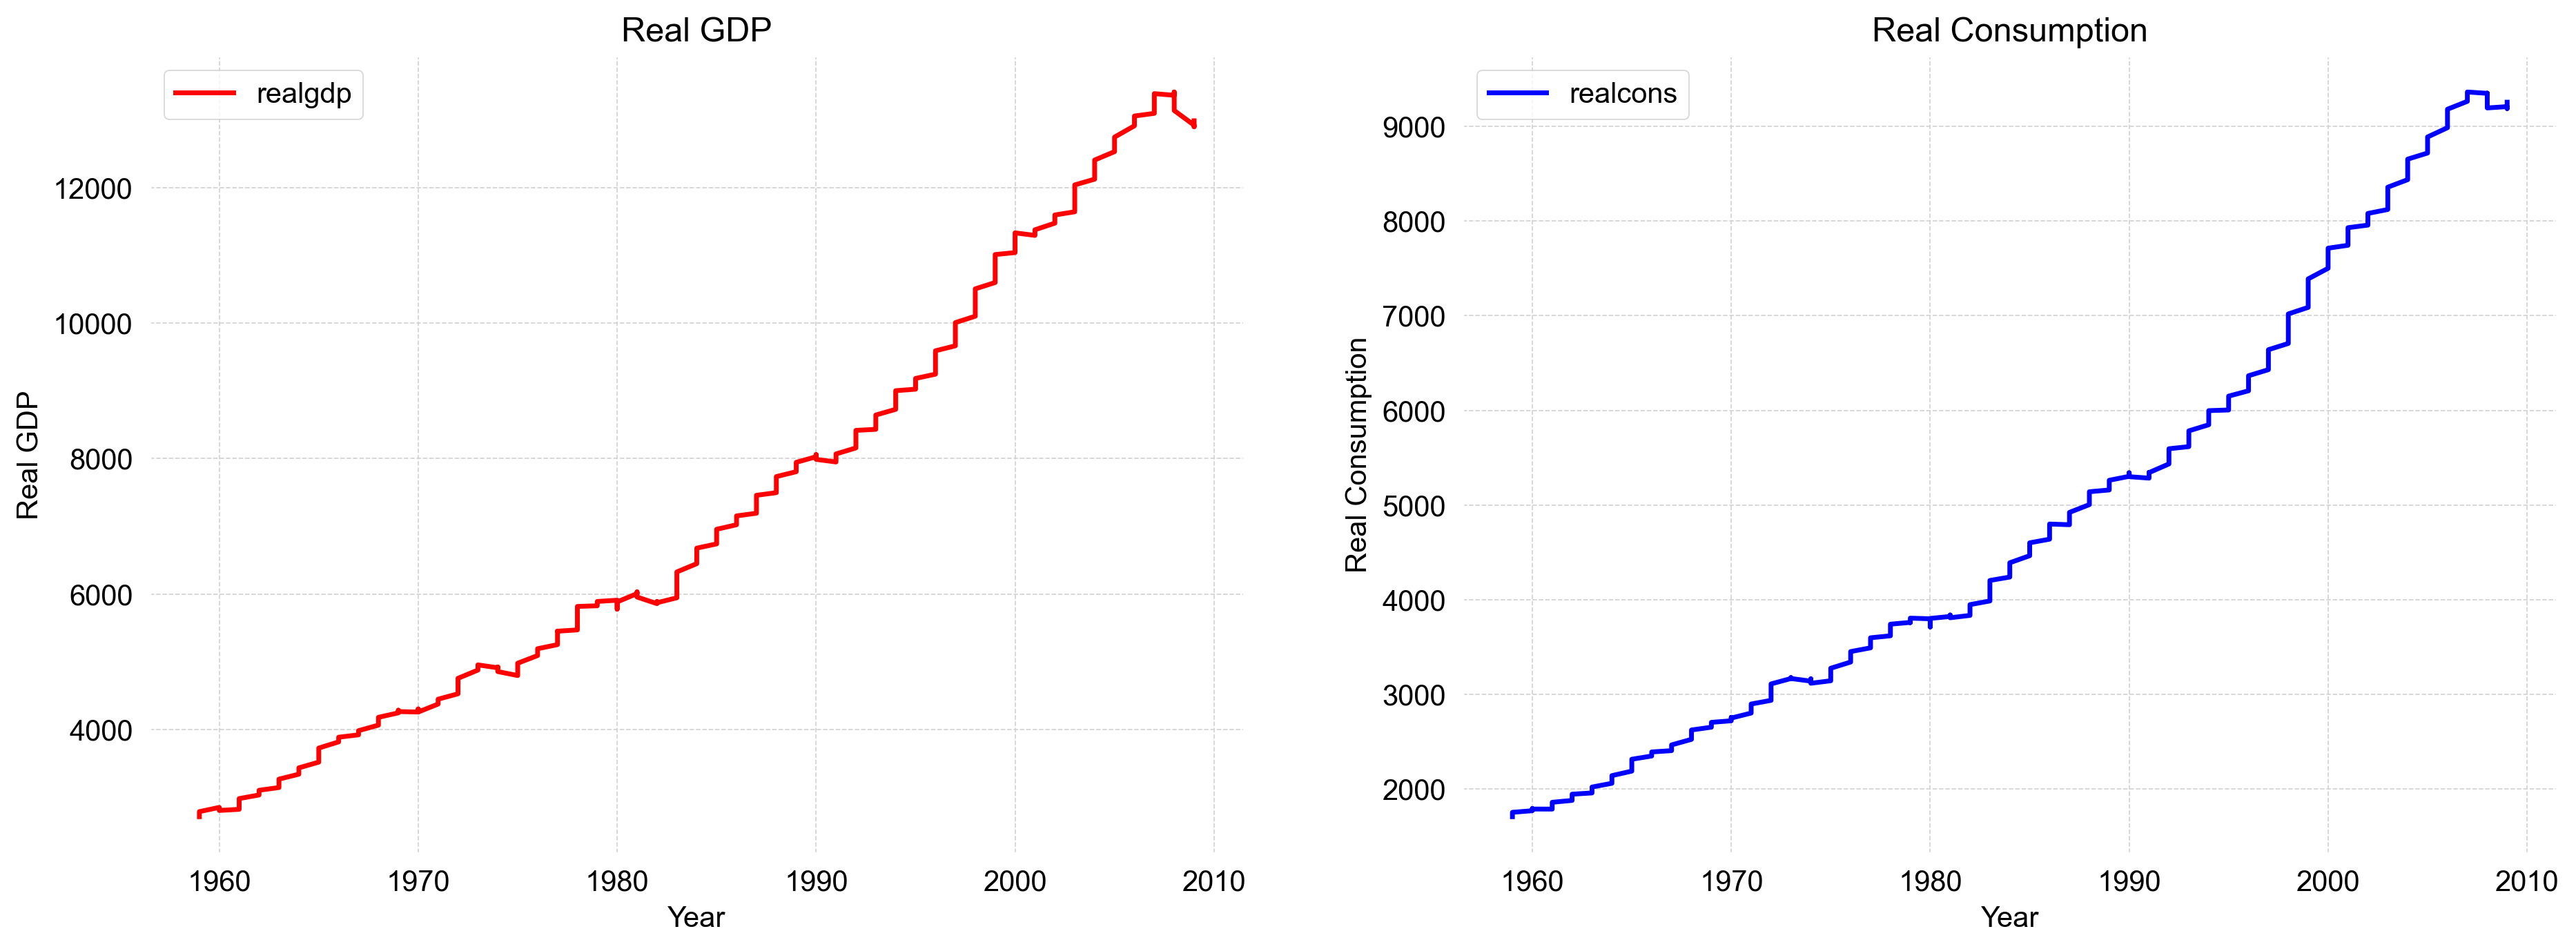

In [6]:
fig, (ax1, ax2) = plt.subplots(1, 2)

macro_data.plot(x='year', y='realgdp', color='red', ax=ax1)
set_plot(ax1, 'Real GDP', 'Year', 'Real GDP')

macro_data.plot(x='year', y='realcons', color='blue', ax=ax2)
set_plot(ax2, 'Real Consumption', 'Year', 'Real Consumption')

### 1.1. Augmented Dickey-Fuller Test

In [7]:
ad_fuller_result_1 = adfuller(macro_data['realgdp'].diff().dropna())

print('Augmented Dickey-Fuller Test Results for Real GDP')
print('-----------------------------------------------')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')
print(f'No. of lags used: {ad_fuller_result_1[2]}')
print(f'No. of observations used: {ad_fuller_result_1[3]}')
print('Critical Values:')

for key, value in ad_fuller_result_1[4].items():
    print(f'   {key}: {value}')

Augmented Dickey-Fuller Test Results for Real GDP
-----------------------------------------------
ADF Statistic: -6.305695561658104
p-value: 3.327882187668259e-08
No. of lags used: 1
No. of observations used: 200
Critical Values:
   1%: -3.463476079125
   5%: -2.876102355
   10%: -2.574532225


In [8]:
ad_fuller_result_2 = adfuller(macro_data['realcons'].diff().dropna())

print('Augmented Dickey-Fuller Test Results for Real Consumption')
print('-----------------------------------------------')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')
print(f'No. of lags used: {ad_fuller_result_2[2]}')
print(f'No. of observations used: {ad_fuller_result_2[3]}')
print('Critical Values:')

for key, value in ad_fuller_result_2[4].items():
    print(f'   {key}: {value}')

Augmented Dickey-Fuller Test Results for Real Consumption
-----------------------------------------------
ADF Statistic: -4.204306080845247
p-value: 0.0006479282158627571
No. of lags used: 3
No. of observations used: 198
Critical Values:
   1%: -3.4638151713286316
   5%: -2.876250632135043
   10%: -2.574611347821651


### 1.2. VAR Model